In [0]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense,LSTM,Activation,Flatten,Dropout
from tensorflow.keras.models import Sequential
#Here we are importing the needed libraries. Tensorflow is very popular library for deep learning projects and I will use it in this project. I will explain what layers and models are afterwards. We are trying to predict the FB stock prices
#using one of the best tools avaiable to do so - Recurrent Neural Networks,but they got a disadvantage, it is so called Vanishing gradient. If weights are not in the right scope, we could end up with this vanishing or in the other case
#exploding gradient. Algorithms tries to change the weights in the first layers,and if you have multiple layers it is becomming more and more difficult to the point that nothing changes and your algorithm stops learning from the first
#layers as it should do. This is why LSTM(Long short-term memory) model is applied.It has multiple gates(forget,input and output gate),and one very important 'Cell state' that allow us to see what part of the cell state we are going to output.
#It is flowing in the most cases unregulated with some minor changes, and this is what differs in the most part LSTM from RNN.

In [69]:
from google.colab import files
uploaded = files.upload()
#This is just Google Colab thing

Saving FB_train.csv to FB_train (1).csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['FB_train.csv']))

In [71]:
df 
#This is our dataset. For our purpose I am going to take just the 'Open column to make a prediction.

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
1865,2019-10-17,190.300003,190.839996,188.770004,190.389999,190.389999,9603000
1866,2019-10-18,190.229996,191.490005,183.919998,185.850006,185.850006,16874200
1867,2019-10-21,187.039993,189.910004,186.750000,189.759995,189.759995,8122600
1868,2019-10-22,190.000000,190.649994,181.500000,182.339996,182.339996,19537600


In [0]:
df = df['Open'].values
#It is no more a DataFrame, but an array

In [73]:
df

array([ 42.049999,  36.529999,  32.610001, ..., 187.039993, 190.      ,
       182.009995])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
df = scaler.fit_transform(np.reshape(df,(-1,1)))
#Important step. We have to scale our data, otherwise the algorithms either will not converge, or it will converge very slowly

In [76]:
df.shape

(1870, 1)

In [143]:
X_train = []
y_train = []
for i in range(50,len(df)):
  X_train.append(df[i-50:i,0])
  y_train.append(df[i,0])
print(len(y_train),len(X_train))
#This too is very important step.It may not be obvious at first glance,but the whole idea behind this code is to make a X_train tensor with length equal to 50, and y_train in this case is the 51 element the algorithms tries to predict.
#This is repeated for all the values. It is like X_train = 1,2,3,4,5 and y_train = 6,the other iteration is for example X_train = 2,3,4,5,6,7,y_train = 7 and so on. It is pretty self-explanatory when you get the idea behind it

1820 1820


In [78]:
X_train = np.array(X_train)
y_train = np.array(y_train)
#Making an array of the data,it is easier to manipulate

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape
#LSTM accept arrays with 3 dimensions. For this particular reason I am reshaping our array and adding one additional dimension that does nothing, but it is mandatory to have if I want to pass it to the LSTM layer

(1820, 50, 1)

In [0]:
model = Sequential()
#It is just linear stack of layers. We can add layers in the way I did it down.

In [144]:
model.add(LSTM(units=100,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.1))
#We are adding a LSTM layer with 100 units,that is how many LSTM blocks,or nodes the model will have in the first layer. The activation is relu, because we want this neuron or block to fire if its value is bigger than 0.
#Whether to return the last output in the output sequence, or the full sequence.
#Dropout is just a regularisation layer,if nothing fires or according to the Dropout layer,it does not matter anymore, it is being dropped

AttributeError: ignored

In [0]:
model.add(LSTM(units=150,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

In [0]:
model.add(LSTM(units=50,activation='relu',))
model.add(Dropout(0.3))

In [0]:
model.add(Dense(units=1))
model.add(Activation('sigmoid'))
#This is just the final prediction of the model. It goes through the sigmoid function to squash it between 0 and 1

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
#Adam is a more popular optimizer. This is the thing that converges our algorithm. The mean_sqaured_error just takes the differences between values and squares them. If this value is high, the optimizer(Adam) is trying to change the  
#weights in such manner that it recreates our predictios as close to the real point as possible.
#Accuracy is just to show us what accuracy the algorithm has, in this case useless.

In [85]:
model.fit(X_train,y_train,batch_size=32,epochs=20,verbose=1)
#Here we fit the model.It is the most exciting part. X_train is our independent values, and y_train is dependent. When the algorithms goes through the batch_size it updates the weights, and I found that 32 is somewhere optimal 

Train on 1820 samples
Epoch 1/20
1820/1820 [==============================] - 18s 10ms/sample - loss: 0.2005 - acc: 0.0000e+00
Epoch 2/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0421 - acc: 0.0000e+00
Epoch 3/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0383 - acc: 0.0000e+00
Epoch 4/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0350 - acc: 0.0000e+00
Epoch 5/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0328 - acc: 0.0000e+00
Epoch 6/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0311 - acc: 0.0000e+00
Epoch 7/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0359 - acc: 0.0000e+00
Epoch 8/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0341 - acc: 0.0000e+00
Epoch 9/20
1820/1820 [==============================] - 17s 9ms/sample - loss: 0.0318 - acc: 0.0000e+00
Epoch 10/20
1820/1820 [==================

In [104]:
from google.colab import files
uploaded = files.upload()

Saving FB_test.csv to FB_test (1).csv


In [0]:
test_set = pd.read_csv(io.BytesIO(uploaded['FB_test.csv']))
#The testing set

In [0]:
test_set = test_set['Open'].values
#Taking only the values

In [0]:
test_set = scaler.transform(np.reshape(test_set,(-1,1)))
#Scaled tensor of test_set

In [0]:
X_test = []
y_test = []
for i in range(50,len(test_set)):
  X_test.append(test_set[i-50:i,0])
  y_test.append(test_set[i,0])
#We are making sure the train_test and the test_set is identical to on another.

In [0]:
X_test,y_test = np.array(X_test),np.array(y_test)
#Making them to arrays

In [133]:
X_test.shape,y_test.shape

((65, 50), (65,))

In [0]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Making X_test a 3 dimensional array

In [0]:
y_pred = model.predict(X_test)
#We are predicting  values based on X_test

In [0]:
import matplotlib.pyplot as plt 
#Importing the library to visualize the y_test and y_pred

In [0]:
y_test = scaler.inverse_transform(y_test)
#I am making sure the data is scaled properly. I want the values to be scaled as in the beginning. For example 1.42432123 becomes back to its real values let's say 122.3

In [0]:
y_pred = scaler.inverse_transform(y_pred)
#Sam thing 

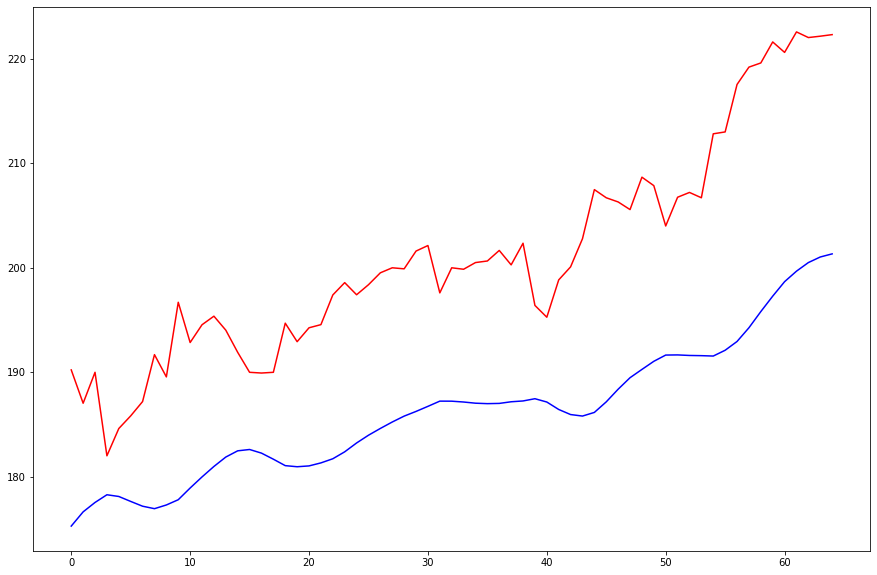

In [141]:
plt.figure(figsize=(15,10))
plt.plot(y_test,color='red',label='Real Values')
plt.plot(y_pred,color='blue',label='Predicted Values')
plt.show()
#As we can see it is not the best model but as you can see it is detecting some trends and correlations which otherwise we as a humans most certainly will not detect.
#Red line are the real values and the blue ones are the predicted ones